Import Libraries and read CSV

In [ ]:
#Import libraries and packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Link to download census df:

https://www.ons.gov.uk/datasets/create/filter-outputs/aeb74d20-cef9-4b3c-9c00-2617854d1f5a#get-data

In [ ]:
#Read csv and excel files

accidents=pd.read_csv(r'/content/drive/MyDrive/ADS/BIG_DATA_STATS19.csv')
census = pd.read_csv(r'/content/drive/MyDrive/ADS/census.csv')

<ipython-input-3-db30553e20b3>:3: DtypeWarning: Columns (0,2,35,37,41,42,44,45,46,47,48,49,50,51,52,53,54,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,77,78,79) have mixed types. Specify dtype option on import or set low_memory=False.
  accidents=pd.read_csv(r'/content/drive/MyDrive/ADS/BIG_DATA_STATS19.csv')


Data Exploration

In [ ]:
city_colours = {
    'Manchester': '#db0a5b',
    'Liverpool': '#F8E256',
    'Sheffield': '#E74C4A'
}

In [ ]:
print(accidents.isnull().all())

accident_index_x          False
accident_year_x           False
accident_reference        False
location_easting_osgr     False
location_northing_osgr    False
                          ...  
propulsion_code           False
age_of_vehicle            False
generic_make_model        False
driver_imd_decile         False
driver_home_area_type     False
Length: 80, dtype: bool


In [ ]:
print(census.isnull().all())

Lower tier local authorities Code    False
Lower tier local authorities         False
Age (6 categories) Code              False
Age (6 categories)                   False
Sex (2 categories) Code              False
Sex (2 categories)                   False
Observation                          False
dtype: bool


In [ ]:
print(accidents.isnull().any())

accident_index_x          False
accident_year_x           False
accident_reference        False
location_easting_osgr      True
location_northing_osgr     True
                          ...  
propulsion_code            True
age_of_vehicle             True
generic_make_model         True
driver_imd_decile          True
driver_home_area_type      True
Length: 80, dtype: bool


In [ ]:
null_cols = accidents.isnull().any()
null_cols = null_cols.loc[null_cols==True]
print(null_cols.index.tolist())

['location_easting_osgr', 'location_northing_osgr', 'longitude', 'latitude', 'local_authority_district', 'first_road_number', 'speed_limit', 'second_road_class', 'second_road_number', 'datetime', 'accident_index_y', 'accident_year_y', 'vehicle_reference_x', 'casualty_reference', 'casualty_class', 'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty', 'casualty_severity', 'pedestrian_location', 'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker', 'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile', 'accident_index', 'accident_year', 'vehicle_reference_y', 'vehicle_type', 'towing_and_articulation', 'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to', 'vehicle_location_restricted_lane', 'junction_location', 'skidding_and_overturning', 'hit_object_in_carriageway', 'vehicle_leaving_carriageway', 'hit_object_off_carriageway', 'first_point_of_impact', 'vehicle_left_hand_drive', 'journey_purpose_of_driver

In [ ]:
print(census.isnull().any())

Lower tier local authorities Code    False
Lower tier local authorities         False
Age (6 categories) Code              False
Age (6 categories)                   False
Sex (2 categories) Code              False
Sex (2 categories)                   False
Observation                          False
dtype: bool


In [ ]:
#number of rows in the DataFrame
num_rows_acc = accidents.shape[0]
num_rows_cen = census.shape[0]

print(num_rows_acc)
print(num_rows_cen)

1404924
3972


Data Cleaning and Preparation

In [ ]:
# renaming the 'local_authority_district' column to 'city' in df "accidents"
accidents = accidents.rename(columns={'local_authority_district': 'city'})

In [ ]:
# renaming the 'Lower tier local authorities' column to 'city' in df "census"
census = census.rename(columns={'Lower tier local authorities': 'city'})

In [ ]:
accidents['city'].isna().sum()

2322

In [ ]:
missing_cities = accidents[accidents['city'].isna()]
missing_cities.to_csv('missing_cities.csv', index=False)

In [ ]:
census['city'].isna().sum()

0

In [ ]:
accidents = accidents.dropna(subset=['city'])

In [ ]:
accidents['city'].isna().sum()

0

In [ ]:
# counting the number of rows where 'local_authority_ons_district' starts with 'S', since census only includes England and Wales, not Scotland.
count_scotland_accidents = (accidents['local_authority_ons_district'].str.startswith('S')).sum()

print(count_scotland_accidents)

74530


In [ ]:
# counting the number of rows where 'local_authority_ons_district' starts with 'W', to only consider England in analysis
count_wales_accidents = (accidents['local_authority_ons_district'].str.startswith('W')).sum()
count_wales_census = (census['Lower tier local authorities Code'].str.startswith('W')).sum()

print(count_wales_accidents)
print(count_wales_census)

53317
264


In [ ]:
# counting the number of unique names in the 'city' column
num_unique_cities_accidents = accidents['city'].nunique()

print(num_unique_cities_accidents)

380


In [ ]:
# counting the number of unique districts that start with 'S'
count_scotland_accidents_unique = accidents.loc[accidents['local_authority_ons_district'].str.startswith('S'), 'local_authority_ons_district'].nunique()

print(count_scotland_accidents_unique)

32


In [ ]:
# counting the number of unique districts that start with 'W'
count_wales_accidents_unique = accidents.loc[accidents['local_authority_ons_district'].str.startswith('W'), 'local_authority_ons_district'].nunique()
count_wales_census_unique = census.loc[census['Lower tier local authorities Code'].str.startswith('W'), 'Lower tier local authorities Code'].nunique()

print(count_wales_accidents_unique)
print(count_wales_census_unique)

22
22


In [ ]:
# shape of the DataFrame before dropping rows
print('Shape of Accidents DataFrame before dropping rows:')
print(accidents.shape)
print('Shape of Census DataFrame before dropping rows:')
print(census.shape)

# dropping rows where 'local_authority_ons_district' starts with 'S' and 'W'
accidents = accidents[~accidents['local_authority_ons_district'].str.startswith('S')]
accidents = accidents[~accidents['local_authority_ons_district'].str.startswith('W')]
census = census[~census['Lower tier local authorities Code'].str.startswith('W')]


# shape of the DataFrame after dropping rows
print('Shape of Accidents DataFrame after dropping rows:')
print(accidents.shape)
print('Shape of Census DataFrame after dropping rows:')
print(census.shape)

Shape of Accidents DataFrame before dropping rows:
(1402602, 80)
Shape of Census DataFrame before dropping rows:
(3972, 7)
Shape of Accidents DataFrame after dropping rows:
(1274755, 80)
Shape of Census DataFrame after dropping rows:
(3708, 7)


In [ ]:
# counting the number of unique names in the 'city' column
num_unique_cities_accidents = accidents['city'].nunique()

print(num_unique_cities_accidents)

326


In [ ]:
# counting the number of unique names in the 'city' column
num_unique_cities_census = census['city'].nunique()

print(num_unique_cities_census)

309


In [ ]:
# finding cities in 'accidents' that are not in 'census'
missing_cities_census = set(accidents['city']) - set(census['city'])

print('Cities in accidents that are not in census:')
print(missing_cities_census)

Cities in accidents that are not in census:
{'Kettering', 'London Airport (Heathrow)', 'Stratford-upon-Avon', 'St. Albans', 'Poole', 'Chiltern', 'South Bucks', 'Daventry', 'West Somerset', 'Wellingborough', 'Corby', 'East Northamptonshire', 'North Dorset', 'Kingston upon Hull, City of', 'Bournemouth', 'West Dorset', 'Bristol, City of', 'Suffolk Coastal', 'Shepway', 'Waveney', 'Herefordshire, County of', 'Christchurch', 'Aylesbury Vale', 'East Dorset', 'South Northamptonshire', 'Northampton', 'St. Edmundsbury', 'Taunton Deane', 'Purbeck', 'Wycombe', 'Weymouth and Portland', 'Forest Heath'}


In [ ]:
# finding cities in 'census' that are not in 'accidents'
missing_cities_accidents = set(census['city']) - set(accidents['city'])

print('Cities in accidents that are not in accidents:')
print(missing_cities_accidents)

Cities in accidents that are not in accidents:
{'Folkestone and Hythe', 'East Suffolk', 'Buckinghamshire', 'Kingston upon Hull', 'Isles of Scilly', 'Somerset West and Taunton', 'Stratford-on-Avon', 'St Albans', 'West Northamptonshire', 'Bristol', 'Dorset', 'North Northamptonshire', 'West Suffolk', 'Bournemouth, Christchurch and Poole', 'Herefordshire'}


Make sure that city names match across datasets after researching what district they belong to and after generalising names.

In [ ]:
# replacing values in the "city" column in "accidents" df
accidents['city'] = accidents['city'].replace({
    'Bristol, City of': 'Bristol',
    'East Dorset': 'Dorset',
    'Herefordshire, County of': 'Herefordshire',
    'Kingston upon Hull, City of': 'Kingston upon Hull',
    'Rhondda, Cynon, Taff': 'Rhondda Cynon Taf',
    'London Airport (Heathrow)': 'City of London',
    'St. Albans': 'St Albans',
    'Stratford-upon-Avon': 'Stratford-on-Avon',
    'The Vale of Glamorgan': 'Vale of Glamorgan',
    'Christchurch': 'Bournemouth',
    'Poole': 'Bournemouth',
    'South Bucks': 'Buckinghamshire',
    'Suffolk Coastal': 'East Suffolk',
    'Northampton': 'Northamptonshire',
    'East Northamptonshire': 'Northamptonshire',
    'South Northamptonshire': 'Northamptonshire',
    'Taunton Deane': 'Somerset West and Taunton',
    'West Somerset': 'Somerset West and Taunton',
    'Forest Heath': 'West Suffolk',
    'Aylesbury Vale': 'Buckinghamshire',
    'Chiltern': 'Buckinghamshire',
    'Corby': 'Northamptonshire',
    'Daventry': 'Northamptonshire',
    'Kettering': 'Northamptonshire',
    'North Dorset': 'Dorset',
    'Purbeck': 'Dorset',
    'St. Edmundsbury': 'Bury',
    'Waveney': 'East Suffolk',
    'Wellingborough': 'Northamptonshire',
    'West Dorset': 'Dorset',
    'Weymouth and Portland': 'Dorset',
    'Wycombe': 'Buckinghamshire'
})

# replacing values in the "city" column in "census" df
census['city'] = census['city'].replace({
    'Bournemouth, Christchurch and Poole': 'Bournemouth',
    'Folkestone and Hythe': 'Shepway',
    'Isles of Scilly': 'Cornwall',
    'West Northamptonshire': 'Northamptonshire',
    'North Northamptonshire': 'Northamptonshire'
})

In [ ]:
accidents_cities = set(accidents["city"].unique())
census_cities = set(census["city"].unique())

print(accidents_cities.issubset(census_cities))
print(census_cities.issubset(accidents_cities))

True
True


Answering Questions

2016 - 2020

In [ ]:
accidents_per_city = accidents.groupby('city')['accident_reference'].count()

In [ ]:
accidents_per_city

city
Adur            1449
Allerdale       2529
Amber Valley    2176
Arun            3256
Ashfield        2909
                ... 
Worthing        2312
Wychavon        3086
Wyre            2492
Wyre Forest     1852
York            4448
Name: accident_reference, Length: 307, dtype: int64

In [ ]:
population_per_city = census.groupby('city')['Observation'].sum()

In [ ]:
population_per_city

city
Adur             63855
Allerdale        95172
Amber Valley    125196
Arun            161433
Ashfield        125185
                 ...  
Worthing        109662
Wychavon        131016
Wyre            110297
Wyre Forest     100610
York            191572
Name: Observation, Length: 307, dtype: int64

In [ ]:
cities = ['Manchester', 'Liverpool', 'Sheffield']

# filtering the census data for the cities in the list
cities_census = census[census['city'].isin(cities)]

# grouping the filtered census data by city and sum the observations to get population
population_cities = cities_census.groupby('city')['Observation'].sum()

print(population_cities)

city
Liverpool     463876
Manchester    530136
Sheffield     535893
Name: Observation, dtype: int64


In [ ]:
# filtering the census data for the cities in the list and for the age category "Aged 15 years and under"
city_census_children = census[(census['city'].isin(cities)) & (census['Age (6 categories)'] == 'Aged 15 years and under')]

# grouping the filtered census data by city and sum the observations to get population of children
population_per_city_children = city_census_children.groupby('city')['Observation'].sum()

print(population_per_city_children)

city
Liverpool      83008
Manchester    113881
Sheffield     100226
Name: Observation, dtype: int64


In [ ]:
accidents_per_capita = (accidents_per_city / population_per_city) * 1000

In [ ]:
# Sorting the dictionary by values in descending order
accidents_per_capita_sorted = dict(sorted(accidents_per_capita.items(), key=lambda x: x[1], reverse=True))

for city, acc_per_capita in accidents_per_capita_sorted.items():
    print(f"In {city}, there is {acc_per_capita:.2f} accidents per 1,000 people")

In City of London, there is 275.85 accidents per 1,000 people
In Westminster, there is 64.78 accidents per 1,000 people
In Tandridge, there is 59.85 accidents per 1,000 people
In North Warwickshire, there is 56.95 accidents per 1,000 people
In Runnymede, there is 52.45 accidents per 1,000 people
In Guildford, there is 44.84 accidents per 1,000 people
In Kensington and Chelsea, there is 43.34 accidents per 1,000 people
In Dartford, there is 42.12 accidents per 1,000 people
In Mole Valley, there is 38.04 accidents per 1,000 people
In Camden, there is 37.43 accidents per 1,000 people
In Ryedale, there is 37.38 accidents per 1,000 people
In West Lindsey, there is 36.65 accidents per 1,000 people
In Lambeth, there is 36.53 accidents per 1,000 people
In East Lindsey, there is 35.43 accidents per 1,000 people
In Winchester, there is 34.52 accidents per 1,000 people
In Sevenoaks, there is 34.34 accidents per 1,000 people
In Tower Hamlets, there is 34.31 accidents per 1,000 people
In Reigate an

In [ ]:
# Filtering the dictionary to only include the cities of interest
accidents_per_capita_subset = {city: acc_per_capita for city, acc_per_capita in accidents_per_capita.items() if city in cities}

# Sorting the filtered dictionary by values in descending order
accidents_per_capita_subset_sorted = dict(sorted(accidents_per_capita_subset.items(), key=lambda x: x[1], reverse=True))

for city, acc_per_capita in accidents_per_capita_subset_sorted.items():
    print(f"In {city}, there is {acc_per_capita:.2f} accidents per 1,000 people")

In Liverpool, there is 23.96 accidents per 1,000 people
In Sheffield, there is 23.07 accidents per 1,000 people
In Manchester, there is 20.71 accidents per 1,000 people


In [ ]:
accidents_per_capita_series = pd.Series(accidents_per_capita_sorted)

# Rank of Manchester, Sheffield and Liverpool
rankings = accidents_per_capita_series.rank(ascending=False)
print("Rankings:")
print(rankings.loc[['Manchester', 'Sheffield', 'Liverpool']])

Rankings:
Manchester    183.0
Sheffield     136.0
Liverpool     113.0
dtype: float64


In [ ]:
print(accidents['date'].dtype)  
accidents['date'] = pd.to_datetime(accidents['date'])  
print(accidents['date'].dtype)  

year = accidents['date'].dt.year.unique()
print(year)

object
datetime64[ns]
[2016 2017 2018 2019 2020]


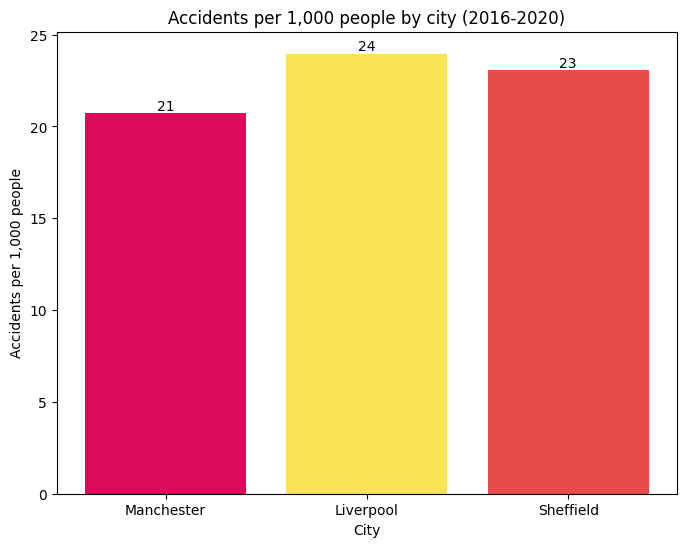

In [ ]:
accidents_per_capita_subset = accidents_per_capita.loc[cities]

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(accidents_per_capita_subset.index, accidents_per_capita_subset.values, color=[city_colours[c] for c in accidents_per_capita_subset.index])

# title and axis labels
ax.set_title('Accidents per 1,000 people by city (2016-2020)')
ax.set_xlabel('City')
ax.set_ylabel('Accidents per 1,000 people')

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.0f}', ha='center', va='bottom')

plt.show()

Manchester

In [ ]:
# Filtering the accidents dataframe to only include accidents in Manchester
manchester_accidents = accidents[accidents['city'] == 'Manchester']

# Grouping the filtered dataframe by year and count the number of accidents per year
accidents_per_year_man = manchester_accidents.groupby(pd.Grouper(key='date', freq='Y')).size()

print(accidents_per_year_man)

date
2016-12-31    1735
2017-12-31    2731
2018-12-31    2630
2019-12-31    2423
2020-12-31    1460
Freq: A-DEC, dtype: int64


In [ ]:
# Filtering the census dataframe to only include data for Manchester
manchester_census = census[census['city'] == 'Manchester']

# Grouping the filtered dataframe by city and sum the observations
population_man = manchester_census.groupby('city')['Observation'].sum()

print(population_man)

city
Manchester    530136
Name: Observation, dtype: int64


In [ ]:
# Calculating the accidents per capita in Manchester per year
accidents_per_capita_man = accidents_per_year_man / population_man.values * 1000

print(accidents_per_capita_man)

date
2016-12-31    3.272745
2017-12-31    5.151508
2018-12-31    4.960991
2019-12-31    4.570525
2020-12-31    2.754010
Freq: A-DEC, dtype: float64


In [ ]:
# Sorting the accidents per capita in descending order
accidents_per_capita_man_sorted = accidents_per_capita_man.sort_values(ascending=False)

for year, accidents_per_capita_year_man in accidents_per_capita_man_sorted.iteritems():
    print(f"In year {year.year}, Manchester had {accidents_per_capita_year_man:.2f} accidents per 1,000 people")

In year 2017, Manchester had 5.15 accidents per 1,000 people
In year 2018, Manchester had 4.96 accidents per 1,000 people
In year 2019, Manchester had 4.57 accidents per 1,000 people
In year 2016, Manchester had 3.27 accidents per 1,000 people
In year 2020, Manchester had 2.75 accidents per 1,000 people


<ipython-input-45-7dc3f1f14e2d>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for year, accidents_per_capita_year_man in accidents_per_capita_man_sorted.iteritems():


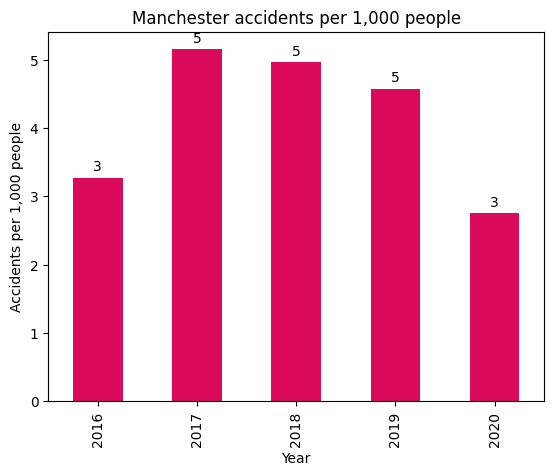

In [ ]:
manchester_color = city_colours['Manchester']

ax = accidents_per_capita_man.plot(kind='bar', color=manchester_color)

# title and axis labels
ax.set_title('Manchester accidents per 1,000 people')
ax.set_xlabel('Year')
ax.set_ylabel('Accidents per 1,000 people')

ax.set_xticklabels([year.year for year in accidents_per_capita_man.index])

for rect in ax.containers[0]:
    height = rect.get_height()
    ax.annotate(f'{height:.0f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.show()

Liverpool

In [ ]:
# Filtering the accidents dataframe to only include accidents in Liverpool
liverpool_accidents = accidents[accidents['city'] == 'Liverpool']

# Grouping the filtered dataframe by year and count the number of accidents per year
accidents_per_year_liv = liverpool_accidents.groupby(pd.Grouper(key='date', freq='Y')).size()

print(accidents_per_year_liv)

date
2016-12-31    2955
2017-12-31    2258
2018-12-31    2165
2019-12-31    2092
2020-12-31    1643
Freq: A-DEC, dtype: int64


In [ ]:
# Filtering the census dataframe to only include data for Liverpool
liverpool_census = census[census['city'] == 'Liverpool']

# Grouping the filtered dataframe by city and sum the observations
population_liv = liverpool_census.groupby('city')['Observation'].sum()

print(population_liv)

city
Liverpool    463876
Name: Observation, dtype: int64


In [ ]:
# Calculating the accidents per capita in Liverpool per year
accidents_per_capita_liv = accidents_per_year_liv / population_liv.values * 1000

print(accidents_per_capita_liv)

date
2016-12-31    6.370237
2017-12-31    4.867680
2018-12-31    4.667196
2019-12-31    4.509826
2020-12-31    3.541895
Freq: A-DEC, dtype: float64


In [ ]:
# Sorting the accidents per capita in descending order
accidents_per_capita_liv_sorted = accidents_per_capita_liv.sort_values(ascending=False)

for year, accidents_per_capita_year_liv in accidents_per_capita_liv_sorted.iteritems():
    print(f"In year {year.year}, Liverpool had {accidents_per_capita_year_liv:.2f} accidents per 1,000 people")

In year 2016, Liverpool had 6.37 accidents per 1,000 people
In year 2017, Liverpool had 4.87 accidents per 1,000 people
In year 2018, Liverpool had 4.67 accidents per 1,000 people
In year 2019, Liverpool had 4.51 accidents per 1,000 people
In year 2020, Liverpool had 3.54 accidents per 1,000 people


<ipython-input-50-aca7af934bfe>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for year, accidents_per_capita_year_liv in accidents_per_capita_liv_sorted.iteritems():


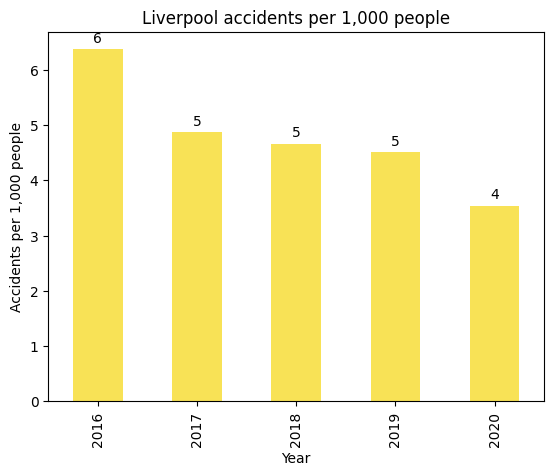

In [ ]:
liverpool_color = city_colours['Liverpool']

# Creating a bar plot of the accidents per capita in Liverpool per year
ax = accidents_per_capita_liv.plot(kind='bar', color=liverpool_color)

ax.set_title('Liverpool accidents per 1,000 people')
ax.set_xlabel('Year')
ax.set_ylabel('Accidents per 1,000 people')

ax.set_xticklabels([year.year for year in accidents_per_capita_liv.index])

for rect in ax.containers[0]:
    height = rect.get_height()
    ax.annotate(f'{height:.0f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Show the plot
plt.show()

Sheffield

In [ ]:
# Filtering the accidents dataframe to only include accidents in Sheffield
sheffield_accidents = accidents[accidents['city'] == 'Sheffield']

# Grouping the filtered dataframe by year and count the number of accidents per year
accidents_per_year_shef = sheffield_accidents.groupby(pd.Grouper(key='date', freq='Y')).size()

print(accidents_per_year_shef)

date
2016-12-31    3126
2017-12-31    2711
2018-12-31    2473
2019-12-31    2226
2020-12-31    1825
Freq: A-DEC, dtype: int64


In [ ]:
# Filtering the census dataframe to only include data for Sheffield
sheffield_census = census[census['city'] == 'Sheffield']

# Grouping the filtered dataframe by city and sum the observations
population_shef = sheffield_census.groupby('city')['Observation'].sum()

print(population_shef)

city
Sheffield    535893
Name: Observation, dtype: int64


In [ ]:
# Calculating the accidents per capita in Sheffield per year
accidents_per_capita_shef = accidents_per_year_shef / population_shef.values * 1000

print(accidents_per_capita_shef)

date
2016-12-31    5.833254
2017-12-31    5.058846
2018-12-31    4.614727
2019-12-31    4.153814
2020-12-31    3.405531
Freq: A-DEC, dtype: float64


In [ ]:
# Sorting the accidents per capita in descending order
accidents_per_capita_shef_sorted = accidents_per_capita_shef.sort_values(ascending=False)

for year, accidents_per_capita_year_shef in accidents_per_capita_shef_sorted.iteritems():
    print(f"In year {year.year}, Sheffield had {accidents_per_capita_year_shef:.2f} accidents per 1,000 people")

In year 2016, Sheffield had 5.83 accidents per 1,000 people
In year 2017, Sheffield had 5.06 accidents per 1,000 people
In year 2018, Sheffield had 4.61 accidents per 1,000 people
In year 2019, Sheffield had 4.15 accidents per 1,000 people
In year 2020, Sheffield had 3.41 accidents per 1,000 people


<ipython-input-55-05ca34a49f4f>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for year, accidents_per_capita_year_shef in accidents_per_capita_shef_sorted.iteritems():


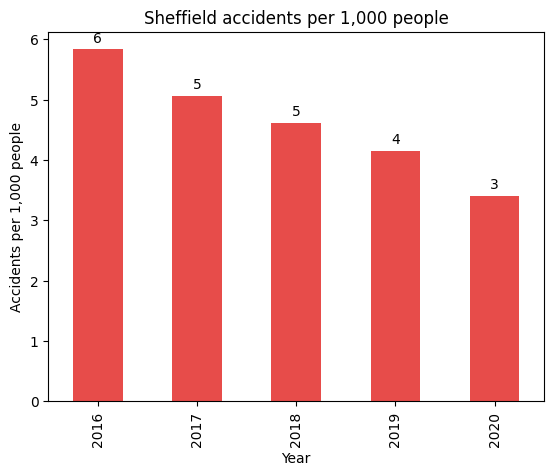

In [ ]:
sheffield_color = city_colours['Sheffield']

# Creating a bar plot of the accidents per capita in Sheffield per year
ax = accidents_per_capita_shef.plot(kind='bar', color=sheffield_color)

ax.set_title('Sheffield accidents per 1,000 people')
ax.set_xlabel('Year')
ax.set_ylabel('Accidents per 1,000 people')

ax.set_xticklabels([year.year for year in accidents_per_capita_shef.index])

for rect in ax.containers[0]:
    height = rect.get_height()
    ax.annotate(f'{height:.0f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.show()

CHILDREN

In [ ]:
# age range categories
age_ranges = {
    1: 'Aged 15 years and under',
    2: 'Aged 16 to 24 years',
    3: 'Aged 25 to 34 years',
    4: 'Aged 35 to 49 years',
    5: 'Aged 50 to 64 years',
    6: 'Aged 65 years and over'
}

# new column 'age_range' based on the age_of_casualty column
accidents['Age (6 categories)'] = pd.cut(
    accidents['age_of_casualty'], 
    bins=[0, 15, 24, 34, 49, 64, 150], 
    labels=[age_ranges[i] for i in range(1,7)]
)

In [ ]:
# Counting the missing values in the 'col_name' column before filling with 'unknown'
num_missing = accidents['Age (6 categories)'].isna().sum()

print(f"There are {num_missing} missing values in the 'col_name' column.")

There are 159868 missing values in the 'col_name' column.


In [ ]:
# children group
age_group = 'Aged 15 years and under'

# Filtering the accidents dataset to include only the age group of interest
accidents_age_group = accidents[accidents['Age (6 categories)'].isin([age_group])]

# Filling missing values in the 'Age (6 categories)' column with 'Unknown'
accidents_age_group['Age (6 categories)'].fillna('Unknown', inplace=True)

# Grouping the filtered dataset by city and count the number of accidents
accidents_per_city_age_group = accidents_age_group.groupby('city')['accident_reference'].count()

# Calculating the accidents per capita using the population data from the census dataset
population_per_city_15_and_under = census[census['Age (6 categories)'].isin([age_group])].groupby('city')['Observation'].sum()
accidents_per_capita_age_group = (accidents_per_city_age_group / population_per_city_15_and_under) * 1000

# Sorting the dictionary by values in descending order
accidents_per_capita_age_group_sorted = dict(sorted(accidents_per_capita_age_group.items(), key=lambda x: x[1], reverse=True))

# top 15 cities with the highest accidents per capita
print(f"Top 15 cities with the highest accidents per 1,000 people for 15 and under age group '{age_group}':")
for city, acc_per_capita_15 in list(accidents_per_capita_age_group_sorted.items())[:15]:
    print(f"In {city}, there is {acc_per_capita_15:.2f} accidents per 1,000 people")

Top 15 cities with the highest accidents per 1,000 people for 15 and under age group 'Aged 15 years and under':
In City of London, there is 27.17 accidents per 1,000 people
In East Lindsey, there is 22.93 accidents per 1,000 people
In Ryedale, there is 20.22 accidents per 1,000 people
In North East Lincolnshire, there is 20.18 accidents per 1,000 people
In North Warwickshire, there is 19.33 accidents per 1,000 people
In Sevenoaks, there is 17.55 accidents per 1,000 people
In Blackpool, there is 16.83 accidents per 1,000 people
In Kingston upon Hull, there is 16.65 accidents per 1,000 people
In Runnymede, there is 16.14 accidents per 1,000 people
In Tandridge, there is 16.02 accidents per 1,000 people
In Hyndburn, there is 15.54 accidents per 1,000 people
In Doncaster, there is 15.26 accidents per 1,000 people
In Preston, there is 15.20 accidents per 1,000 people
In Boston, there is 14.86 accidents per 1,000 people
In West Lindsey, there is 14.79 accidents per 1,000 people


<ipython-input-59-2d5e7726ebcd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_age_group['Age (6 categories)'].fillna('Unknown', inplace=True)


In [ ]:
accidents_per_capita_age_group_cities = {city: acc_per_capita_15 for city, acc_per_capita_15 in accidents_per_capita_age_group_sorted.items() if city in cities}

print(f"Accidents per 1,000 people for {age_group} in Manchester, Liverpool, and Sheffield:")
for city, acc_per_capita_15 in accidents_per_capita_age_group_cities.items():
    print(f"In {city}, there is {acc_per_capita_15:.2f} accidents per 1,000 people")

Accidents per 1,000 people for Aged 15 years and under in Manchester, Liverpool, and Sheffield:
In Liverpool, there is 13.34 accidents per 1,000 people
In Sheffield, there is 10.81 accidents per 1,000 people
In Manchester, there is 9.01 accidents per 1,000 people


In [ ]:
accidents_per_capita_series_age = pd.Series(accidents_per_capita_age_group_sorted)

# rank of Manchester, Sheffield and Liverpool for accidents involving children
rankings = accidents_per_capita_series_age.rank(ascending=False)
print("Rankings:")
print(rankings.loc[['Manchester', 'Sheffield', 'Liverpool']])

Rankings:
Manchester    136.0
Sheffield      72.0
Liverpool      31.0
dtype: float64


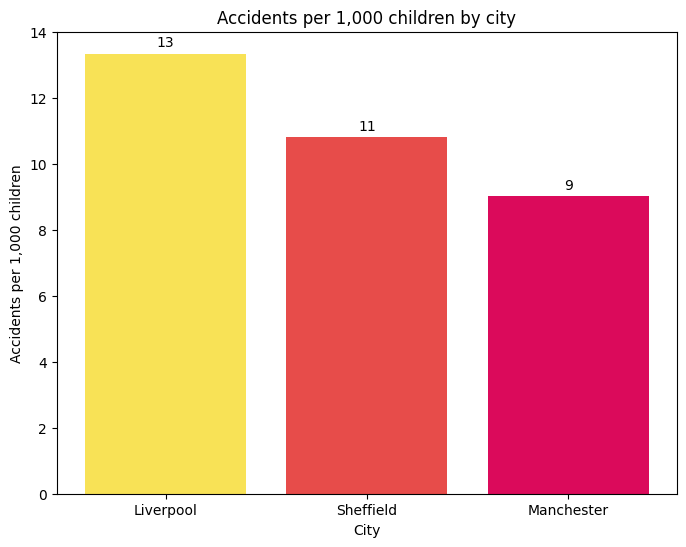

In [ ]:
accidents_per_capita_series_age_cities = pd.Series(accidents_per_capita_age_group_cities)

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(accidents_per_capita_series_age_cities.index, accidents_per_capita_series_age_cities.values, color=[city_colours.get(city) for city in accidents_per_capita_series_age_cities.index])
ax.set_title(f"Accidents per 1,000 children by city")
ax.set_xlabel("City")
ax.set_ylabel("Accidents per 1,000 children")

for rect in ax.containers[0]:
    height = rect.get_height()
    ax.annotate(f'{height:.0f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.show()

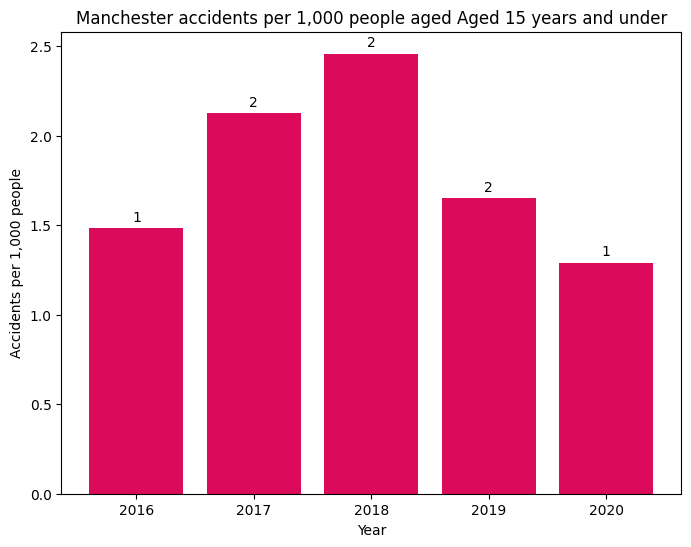

In [ ]:
# Filtering the dataset to include only Manchester
manchester_accidents_age_group = accidents_age_group[accidents_age_group['city'] == 'Manchester']

manchester_accidents_by_year = manchester_accidents_age_group.groupby(manchester_accidents_age_group['date'].dt.year)['accident_reference'].count()

manchester_population_15_and_under = census[(census['Age (6 categories)'] == age_group) & (census['city'] == 'Manchester')]['Observation'].sum()

# accidents per capita for each year
manchester_accidents_per_capita_by_year = (manchester_accidents_by_year / manchester_population_15_and_under) * 1000

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(manchester_accidents_per_capita_by_year.index, manchester_accidents_per_capita_by_year.values, color=city_colours['Manchester'])
ax.set_title(f"Manchester accidents per 1,000 people aged {age_group}")
ax.set_xlabel("Year")
ax.set_ylabel("Accidents per 1,000 people")

for rect in ax.containers[0]:
    height = rect.get_height()
    ax.annotate(f'{height:.0f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.show()

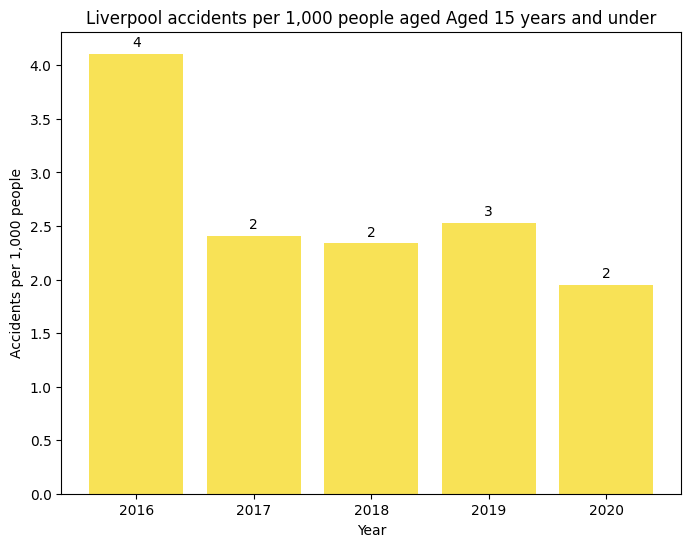

In [ ]:
# Filtering the dataset to include only Liverpool
liverpool_accidents_age_group = accidents_age_group[accidents_age_group['city'] == 'Liverpool']

liverpool_accidents_by_year = liverpool_accidents_age_group.groupby(liverpool_accidents_age_group['date'].dt.year)['accident_reference'].count()

liverpool_population_15_and_under = census[(census['Age (6 categories)'] == age_group) & (census['city'] == 'Liverpool')]['Observation'].sum()

# Calculating the accidents per capita for each year
liverpool_accidents_per_capita_by_year = (liverpool_accidents_by_year / liverpool_population_15_and_under) * 1000

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(liverpool_accidents_per_capita_by_year.index, liverpool_accidents_per_capita_by_year.values, color=city_colours['Liverpool'])
ax.set_title(f"Liverpool accidents per 1,000 people aged {age_group}")
ax.set_xlabel("Year")
ax.set_ylabel("Accidents per 1,000 people")

for rect in ax.containers[0]:
    height = rect.get_height()
    ax.annotate(f'{height:.0f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.show()

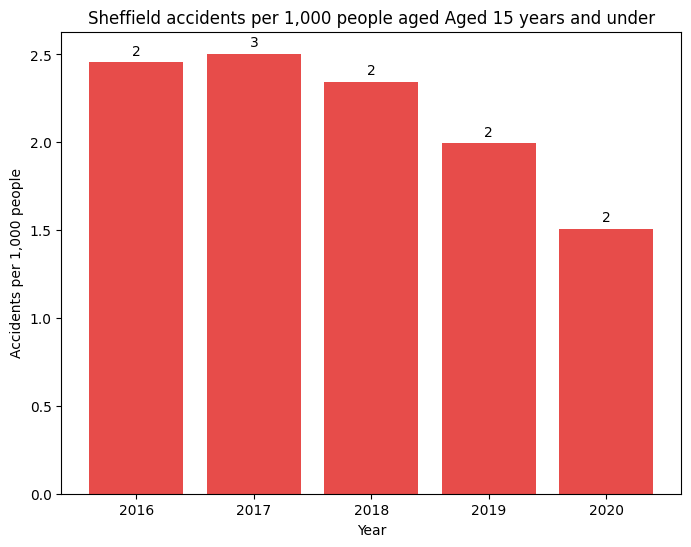

In [ ]:
# Filtering the dataset to include only Sheffield
sheffield_accidents_age_group = accidents_age_group[accidents_age_group['city'] == 'Sheffield']

sheffield_accidents_by_year = sheffield_accidents_age_group.groupby(sheffield_accidents_age_group['date'].dt.year)['accident_reference'].count()

sheffield_population_15_and_under = census[(census['Age (6 categories)'] == age_group) & (census['city'] == 'Sheffield')]['Observation'].sum()

# Calculating the accidents per capita for each year
sheffield_accidents_per_capita_by_year = (sheffield_accidents_by_year / sheffield_population_15_and_under) * 1000

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(sheffield_accidents_per_capita_by_year.index, sheffield_accidents_per_capita_by_year.values, color=city_colours['Sheffield'])
ax.set_title(f"Sheffield accidents per 1,000 people aged {age_group}")
ax.set_xlabel("Year")
ax.set_ylabel("Accidents per 1,000 people")

for rect in ax.containers[0]:
    height = rect.get_height()
    ax.annotate(f'{height:.0f}', xy=(rect.get_x() + rect.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.show()

National Averages

In [ ]:
# total population in the census dataframe
total_population = census['Observation'].sum()

# total number of accidents in the accidents dataframe
total_accidents = accidents['accident_reference'].nunique()

# national average accidents per capita for the UK
national_average = (total_accidents / total_population) * 1000

print(f"The national average of accidents per 1,000 people for England from 2016-2020 is {national_average:.0f}")

The national average of accidents per 1,000 people for England from 2016-2020 is 10


In [ ]:
age_group = 'Aged 15 years and under'

accidents_age_group = accidents[accidents['Age (6 categories)'].isin([age_group])]

accidents_per_city_age_group = accidents_age_group.groupby('city')['accident_reference'].count()

# accidents per capita using the population data from the census dataset
population_per_city_age_group = census[census['Age (6 categories)'].isin([age_group])].groupby('city')['Observation'].sum()
accidents_per_capita_national_age_group = (accidents_per_city_age_group.sum() / population_per_city_age_group.sum()) * 1000

print(f"The national average of accidents per 1,000 people {age_group} in England from 2016-2020 is {accidents_per_capita_national_age_group:.0f}")

The national average of accidents per 1,000 people Aged 15 years and under in England from 2016-2020 is 9
